In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import mnist
import copy as copy
sns.set()

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.set_cmap('jet')

In [242]:
# data loading function
def load_dataset():
    mndata = mnist.MNIST('./python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0

    labels_train = labels_train.astype('int')
    labels_test = labels_test.astype('int')
    return X_train, X_test,labels_train,labels_test

# kmeans functions
def init_random_k_clusters(k):
    centroids = np.random.random((k,784))
    return centroids

def visualize_image(vector):
    plt.figure()
    interp_method = 'bicubic'
    single_image = np.reshape(vector,[28,28])
    plt.imshow(single_image,interpolation=interp_method)
    plt.grid(False)
    plt.axis('off')
    
# cost function
def plt_cost_func_kmeans(iteration,cost):
    
    plt.figure()
    plt.plot(iteration,cost)
    
def cost_func():
    
    return cost

def k_means_distance(centroids,data):
    
    data_labels = np.zeros((data.shape[0],1))
    
    for i in np.arange(data.shape[0]):
        dist_vec = []

        for j in np.arange(centroids.shape[0]):
            dist_ind = np.sqrt(np.sum((centroids[j,:]-data[i,:])**2))
            dist_vec.append(dist_ind)
            
        best_centroid = np.argmin(dist_vec)
        data_labels[i] = best_centroid
        
    return data_labels

def k_means_centroid_update(centroids,data,data_labels):
    centroids_new = np.zeros((centroids.shape))
    
    for i in np.arange(centroids.shape[0]):
        row = np.where(data_labels==i)[0]    

        data_sel = np.squeeze(data[row[:,np.newaxis],:])
        data_mean = np.mean(data_sel,axis=0)
        centroids_new[i,:] = data_mean

    return centroids_new

def run_k_means(k,data):
    centroids = init_random_k_clusters(k)
    not_conv = 1
    iteration = 1
    iter_vec = []
    
    while not_conv:
        labels = k_means_distance(centroids,data)
        centroids = k_means_centroid_update(centroids,data,labels)
        
        iteration +=1
        print(iteration)
        if iteration>10:
            not_conv = 0
            
    import pdb;pdb.set_trace
    
    for i in np.arange(centroids.shape[0]):
        #centroids = np.nan_to_num(centroids)
        visualize_image(centroids[i,:])
        
    plt_cost_func_kmeans(iteration,cost)
    
    return centroids


In [24]:
x_train,x_test,labels_train,labels_test = load_dataset()

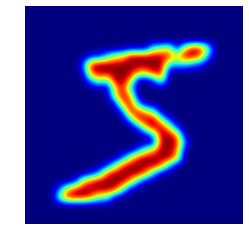

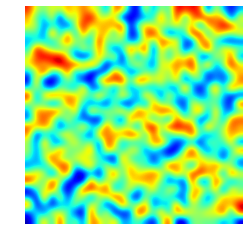

In [243]:
x_train_subset = x_train[1:5000,:]

# demean 

visualize_image(x_train[0][:])


initialized = init_random_k_clusters(5)

visualize_image(initialized[1,:])


In [248]:
labels = k_means_distance(initialized,x_train_subset)

In [249]:
centroids = k_means_centroid_update(initialized,x_train_subset,labels)

In [250]:
centroids.shape

(5, 784)

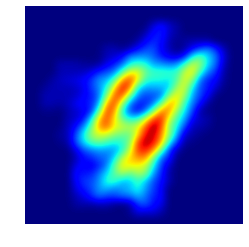

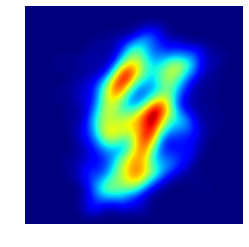

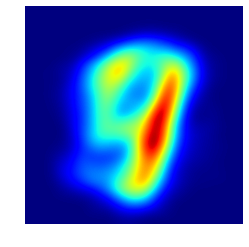

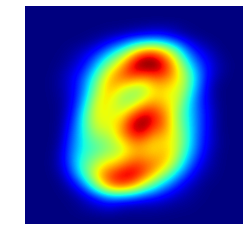

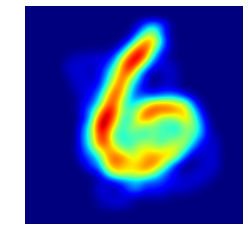

In [251]:
for i in np.arange(centroids.shape[0]):
    centroids = np.nan_to_num(centroids)


    visualize_image(centroids[i,:])

2
3
4
5
6
7
8
9
10
11


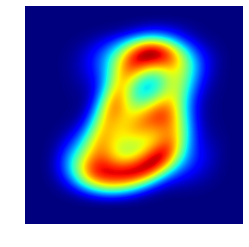

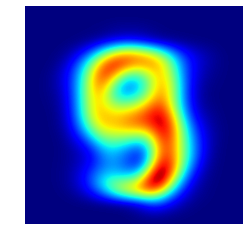

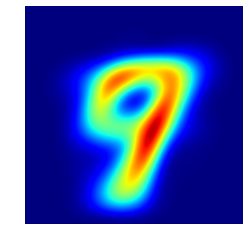

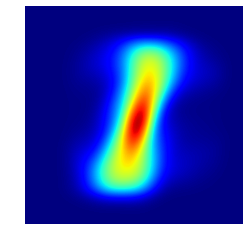

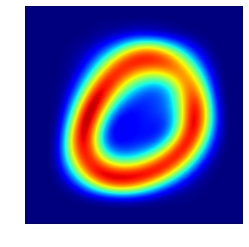

In [260]:
centroids = run_k_means(5,x_train)

In [154]:
data = x_train_subset
centroids = initialized

data_labels = np.zeros((data.shape[0],1))

for i in np.arange(data.shape[0]):
    dist_vec = []

    for j in np.arange(centroids.shape[0]):
        dist_ind = np.sqrt(np.sum((centroids[j,:]-data[i,:])**2))
        dist_vec.append(dist_ind)

    best_centroid = np.argmin(dist_vec)
    data_labels[i] = best_centroid

In [162]:
len(row)

783

In [124]:
data_sel = np.squeeze(data[row[:,np.newaxis],:])
np.mean(data_sel,axis=0).shape

(784,)